In [4]:
import us
import pandas as pd
import geopandas
import numpy as np

from shapely.geometry import Point
from geopandas.plotting import plot_point_collection

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.style.use('seaborn-muted')

In [6]:
df = pd.read_json('../data/tract-scores.json', lines=True)

In [7]:
df.head(10)

ALAND  ALAND_SQMI   AWATER  AWATER_SQMI   DENSITY        GEOID  HU10  \
0    8004985       3.091   237951        0.092  0.221096   1073012803  2762   
1     290536       0.112        0        0.000  2.327494   6037224320  1071   
2    4523012       1.746        0        0.000  0.758635  17197880420  2849   
3    7347160       2.837   126179        0.049  1.820234  34027043303  1463   
4     498865       0.193        0        0.000  3.282402  36081102900  1330   
5    7502237       2.897        0        0.000  0.182020  47093005803  1116   
6   12904730       4.983     6526        0.003  1.671252   6037400403  1416   
7    7381318       2.850  1042442        0.402  0.052995   6079012505  1931   
8  126633075      48.893  2491328        0.962  0.076273  18017951700  1162   
9     322973       0.125        0        0.000  0.250561  22071008300   703   

    INTPTLAT   INTPTLONG  POP10 USPS  
0  33.458473  -86.717319   4734   AL  
1  34.041588 -118.280853   3224   CA  
2  41.564424  -88.247418  10373   IL  
3  40.770937  -74.483864   3511   NJ  
4  40.783915  -73.807370   3319   NY  
5  35.897739  -84.148696   2635   TN  
6  34.146750 -117.800793   3815   CA  
7  35.511674 -120.681159   4891   CA  
8  40.743435  -86.231804   2743   IN  
9  29.929124  -90.078232   1127   LA

In [8]:
df['point'] = df.apply(lambda r: Point(r.INTPTLONG, r.INTPTLAT), axis=1)

In [10]:
states = geopandas.read_file('../data/cb_2017_us_state_5m/cb_2017_us_state_5m.shp')

In [29]:
uas = geopandas.read_file('../data/cb_2017_us_ua10_500k/cb_2017_us_ua10_500k.shp')

In [9]:
gdf = geopandas.GeoDataFrame(df, geometry='point', crs={'init': 'epsg:4326', 'no_defs': True})

In [31]:
states = states.to_crs(epsg=3395)
uas = uas.to_crs(epsg=3395)
gdf = gdf.to_crs(epsg=3395)

In [105]:
def plot_state(state):
    
    ax = states[states.STUSPS==state].plot(color='white', edgecolor='black', figsize=(20,20))
    
    sdf = gdf[gdf.USPS==state]
    plot_point_collection(ax, sdf.point, sdf.DENSITY, markersize=sdf['POP10'] / 200, alpha=1, cmap='Reds')

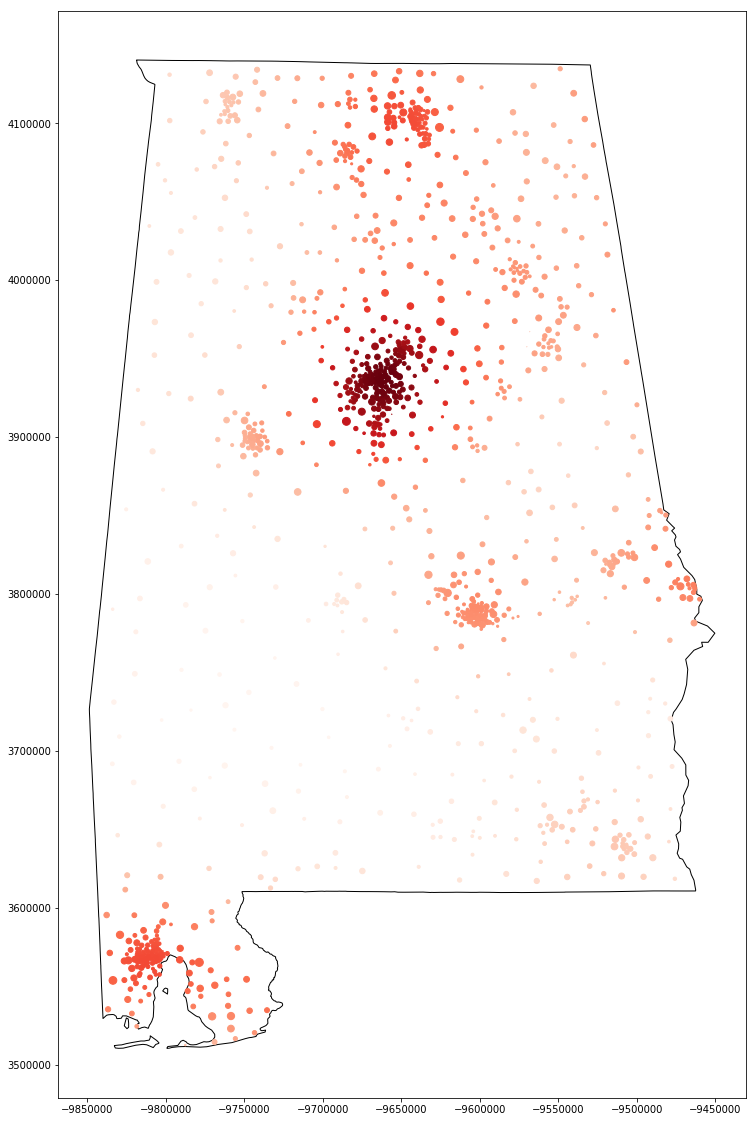

In [14]:
plot_state('AL')

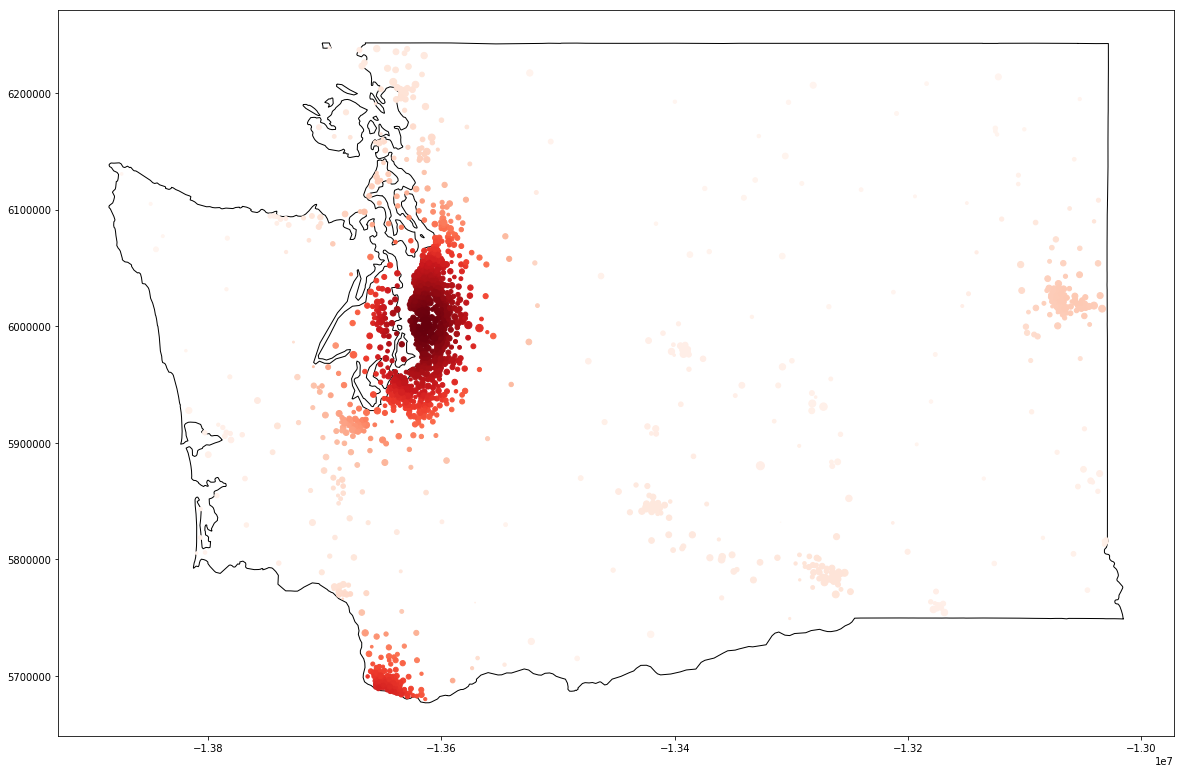

In [15]:
plot_state('WA')

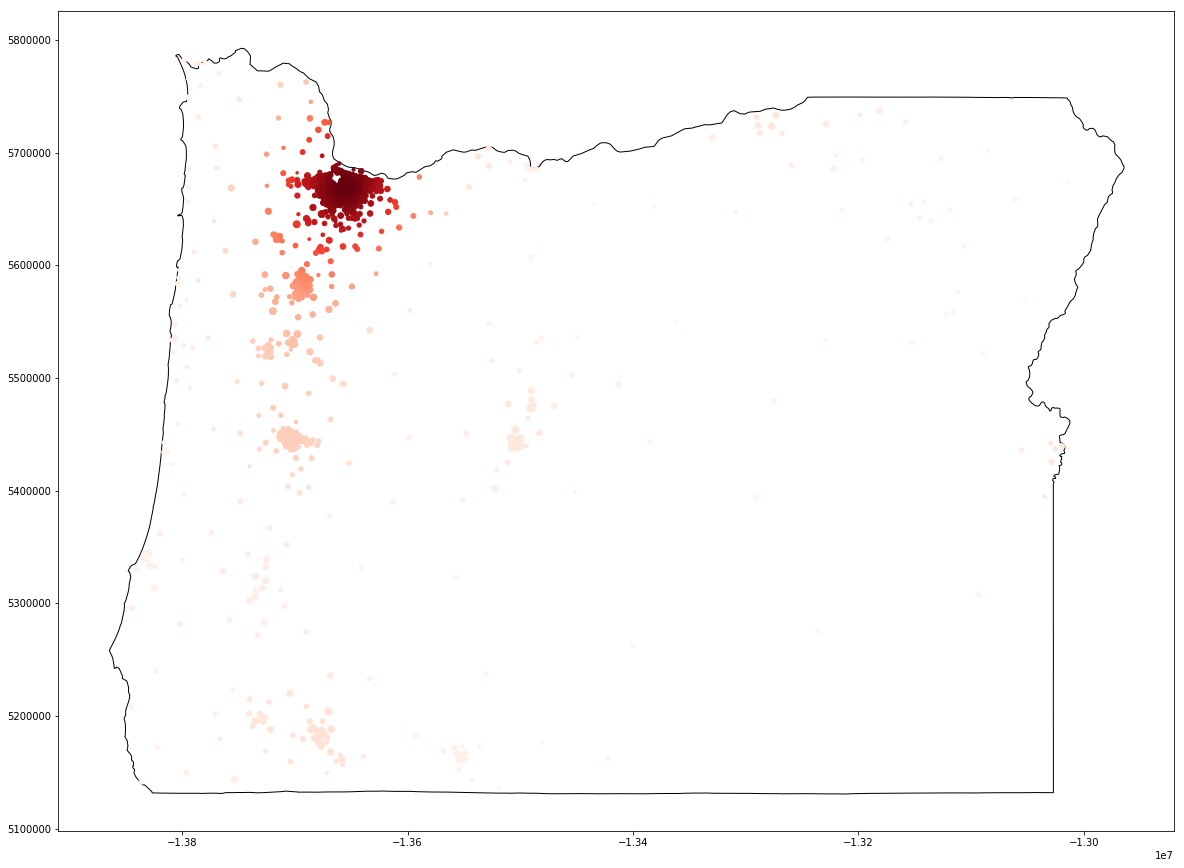

In [16]:
plot_state('OR')

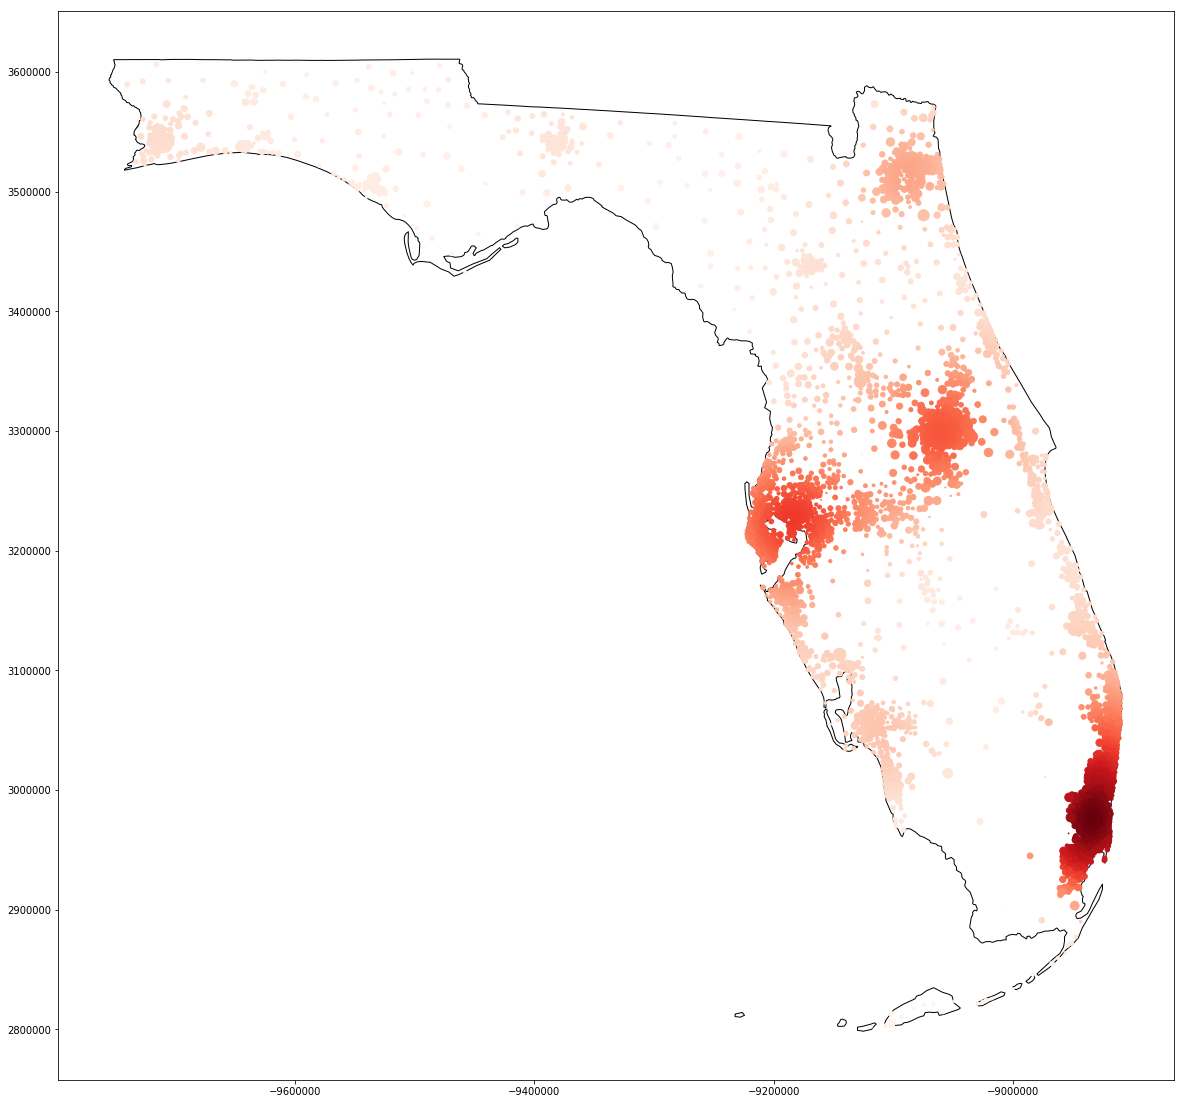

In [17]:
plot_state('FL')

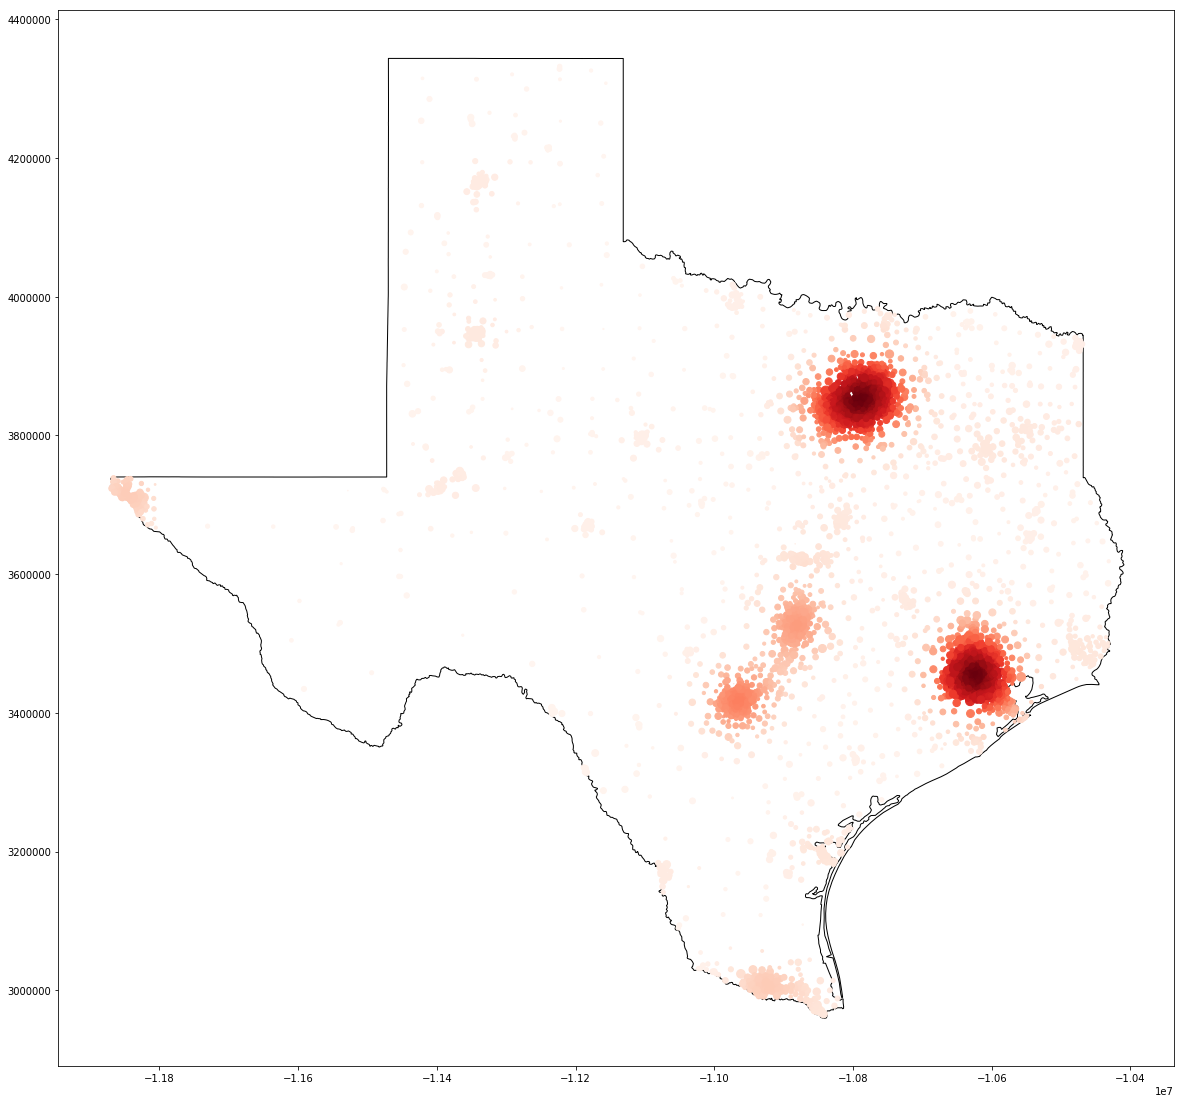

In [18]:
plot_state('TX')

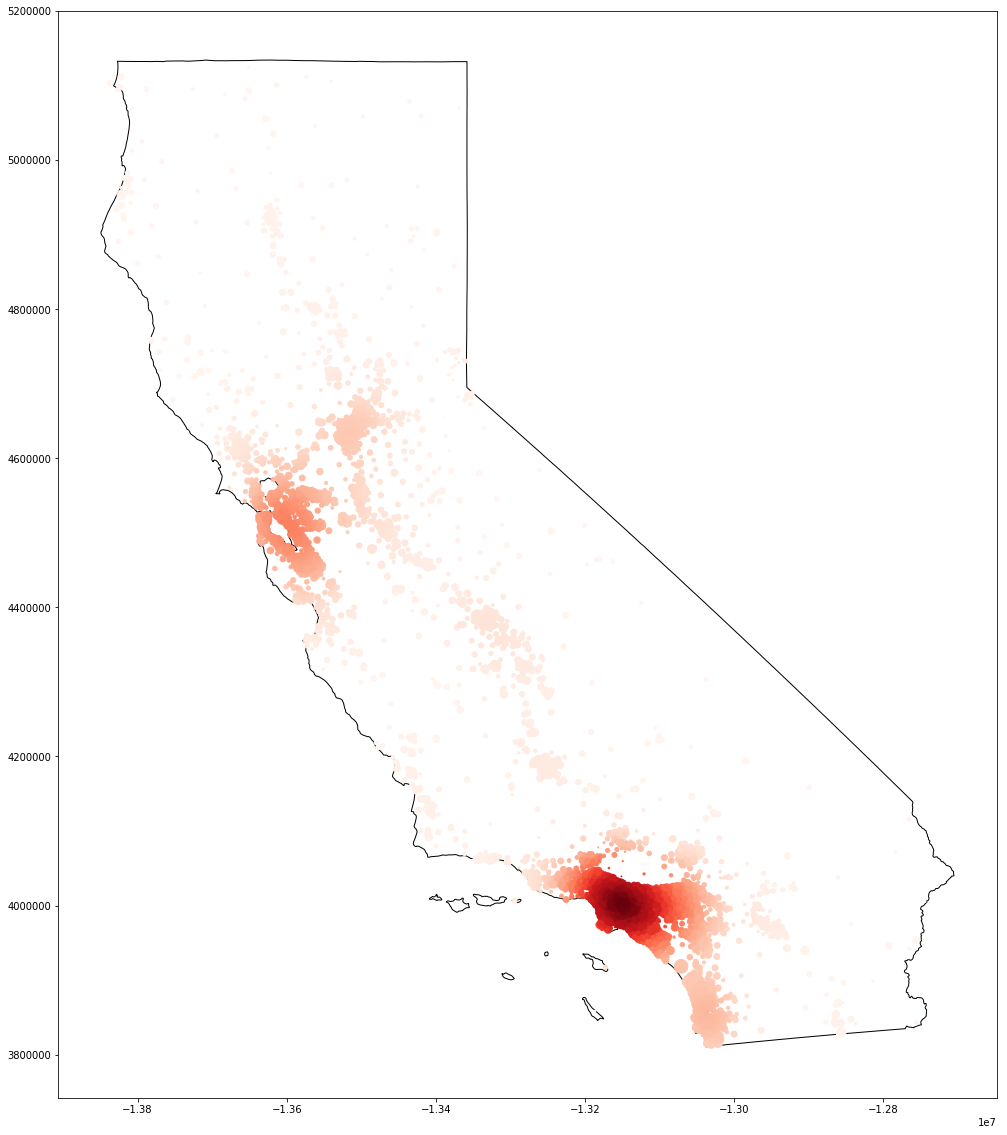

In [19]:
plot_state('CA')

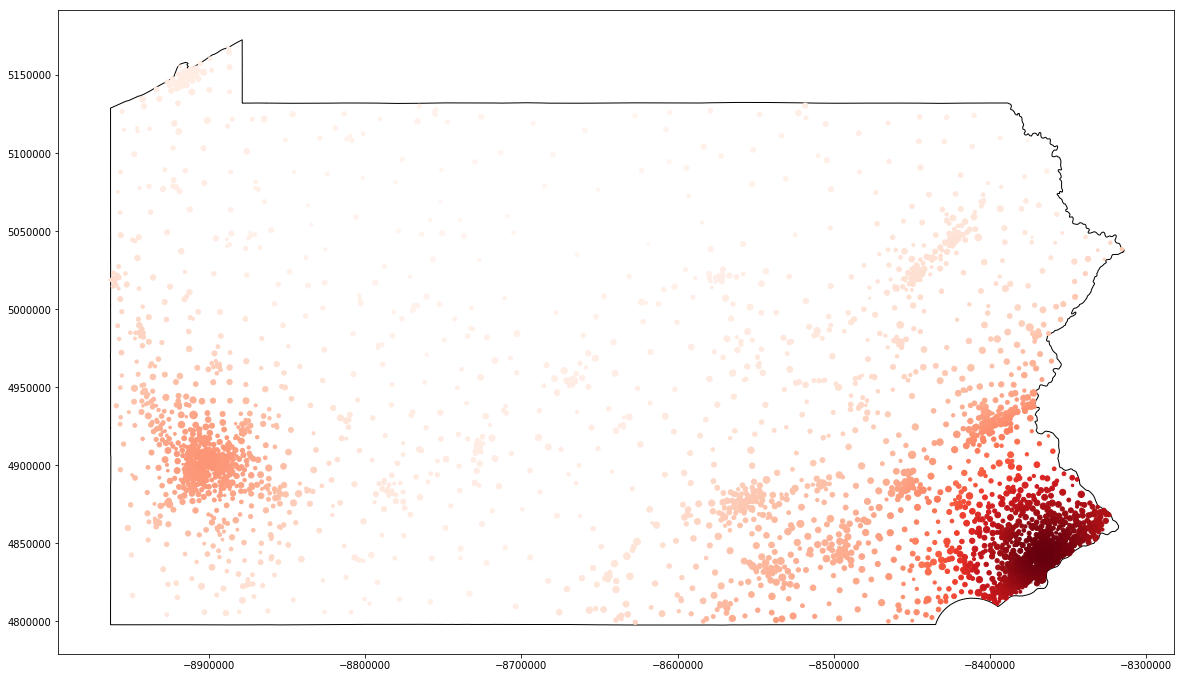

In [20]:
plot_state('PA')

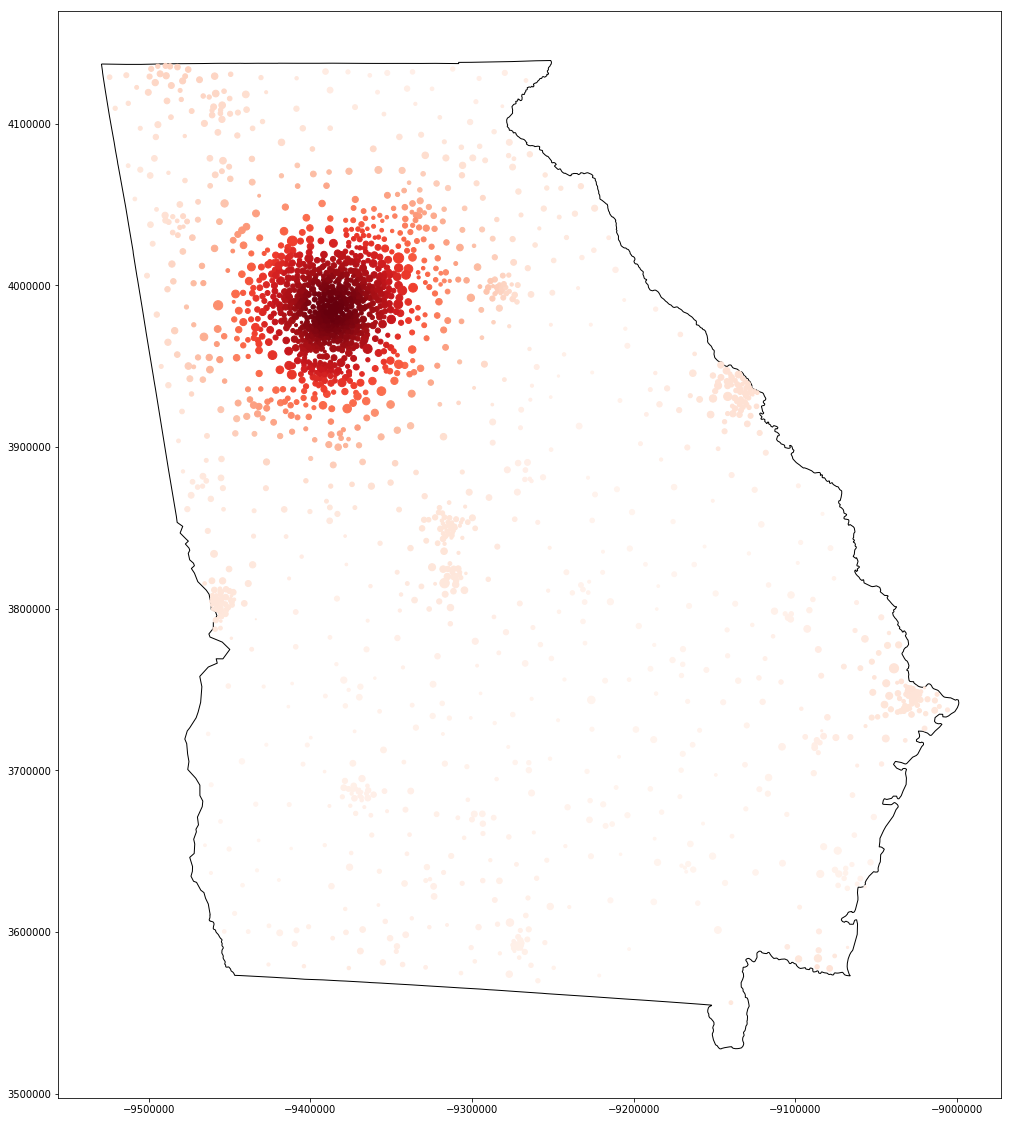

In [21]:
plot_state('GA')

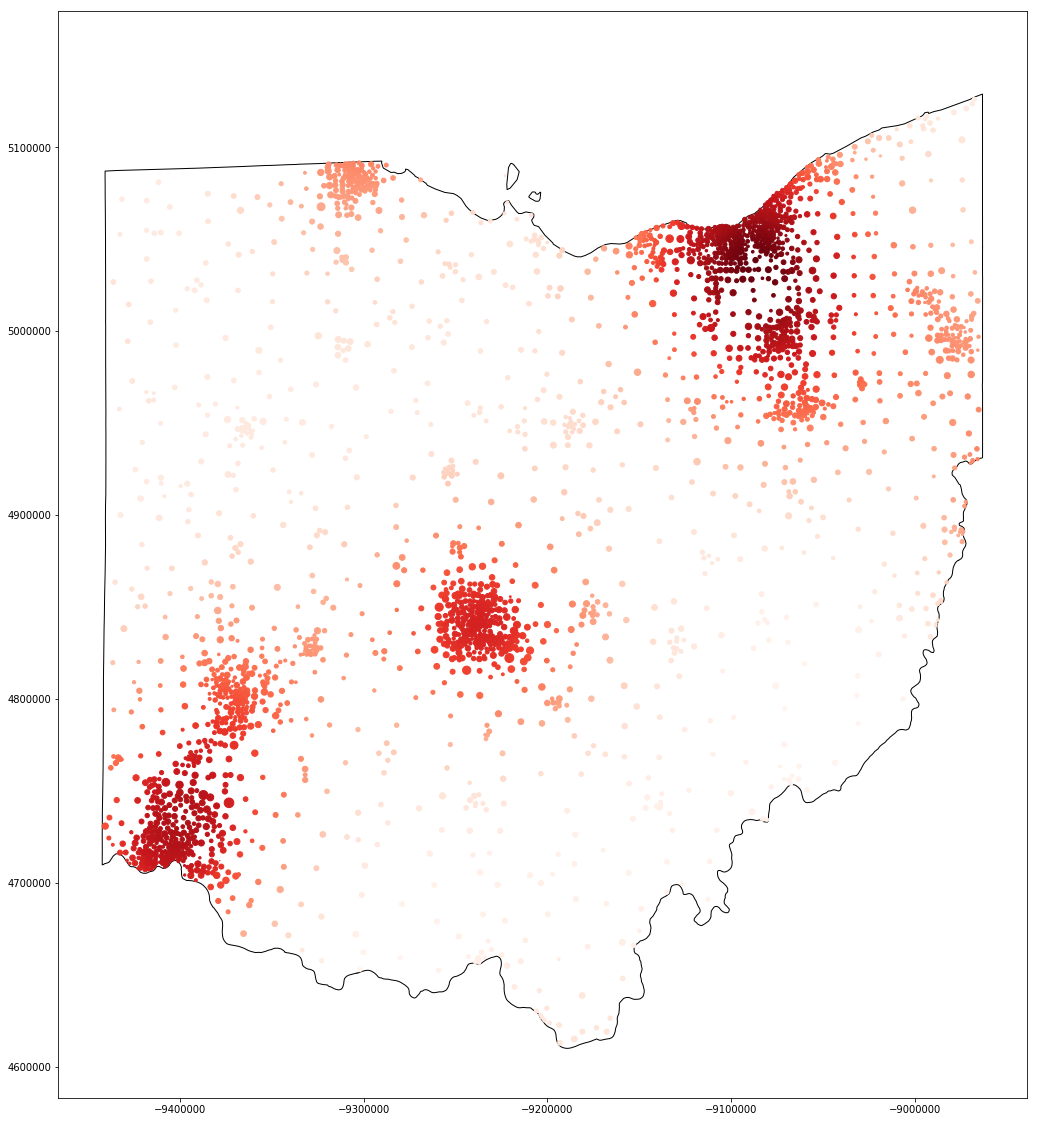

In [22]:
plot_state('OH')

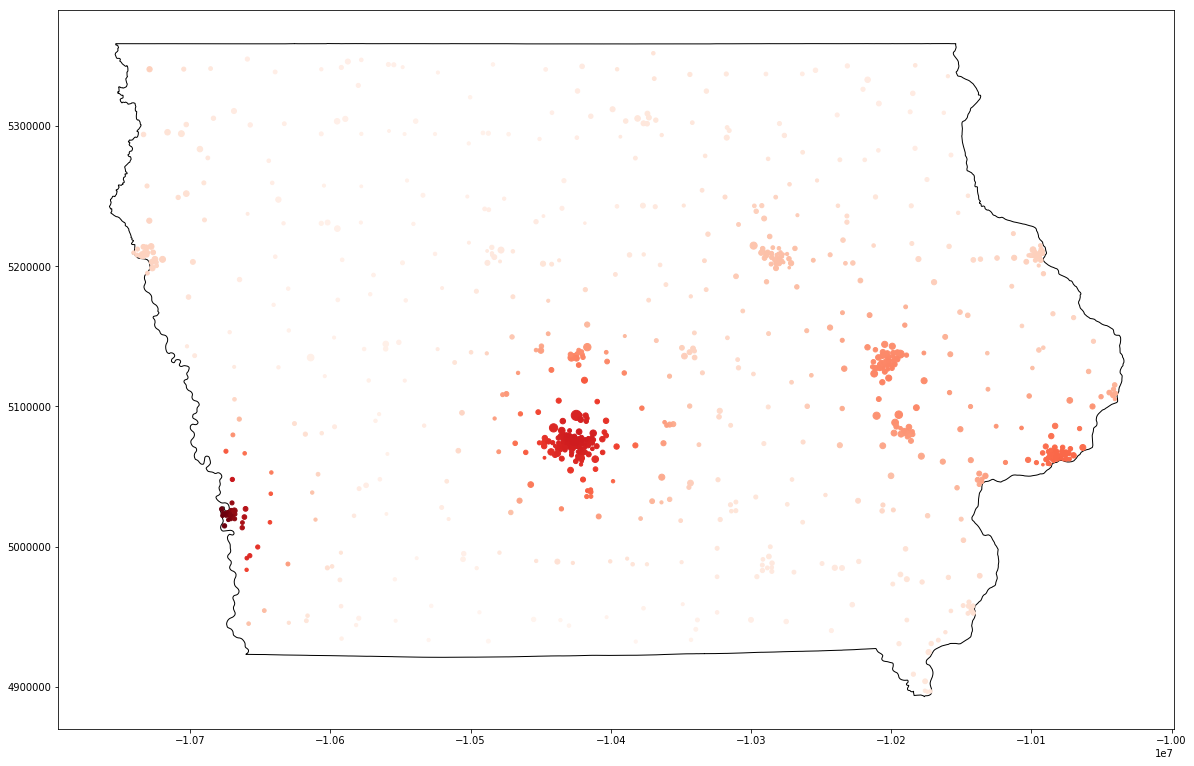

In [23]:
plot_state('IA')

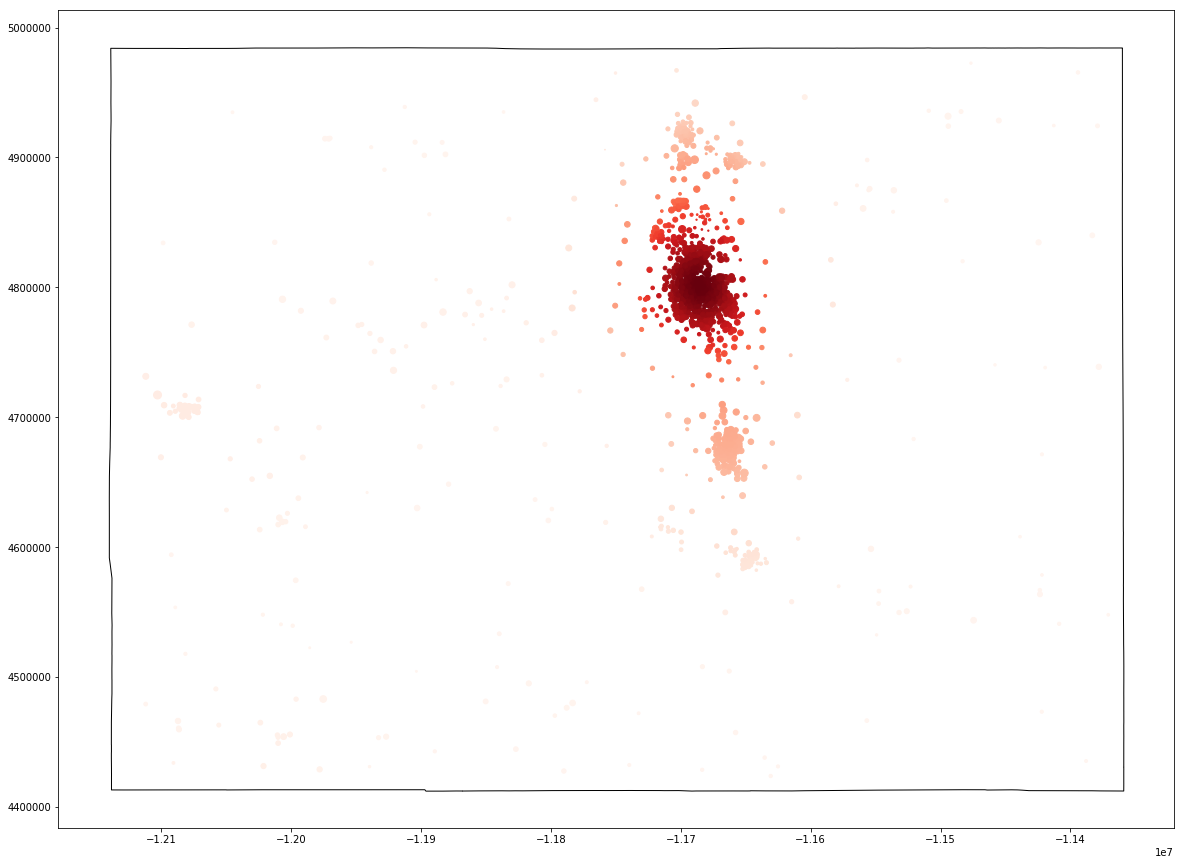

In [24]:
plot_state('CO')

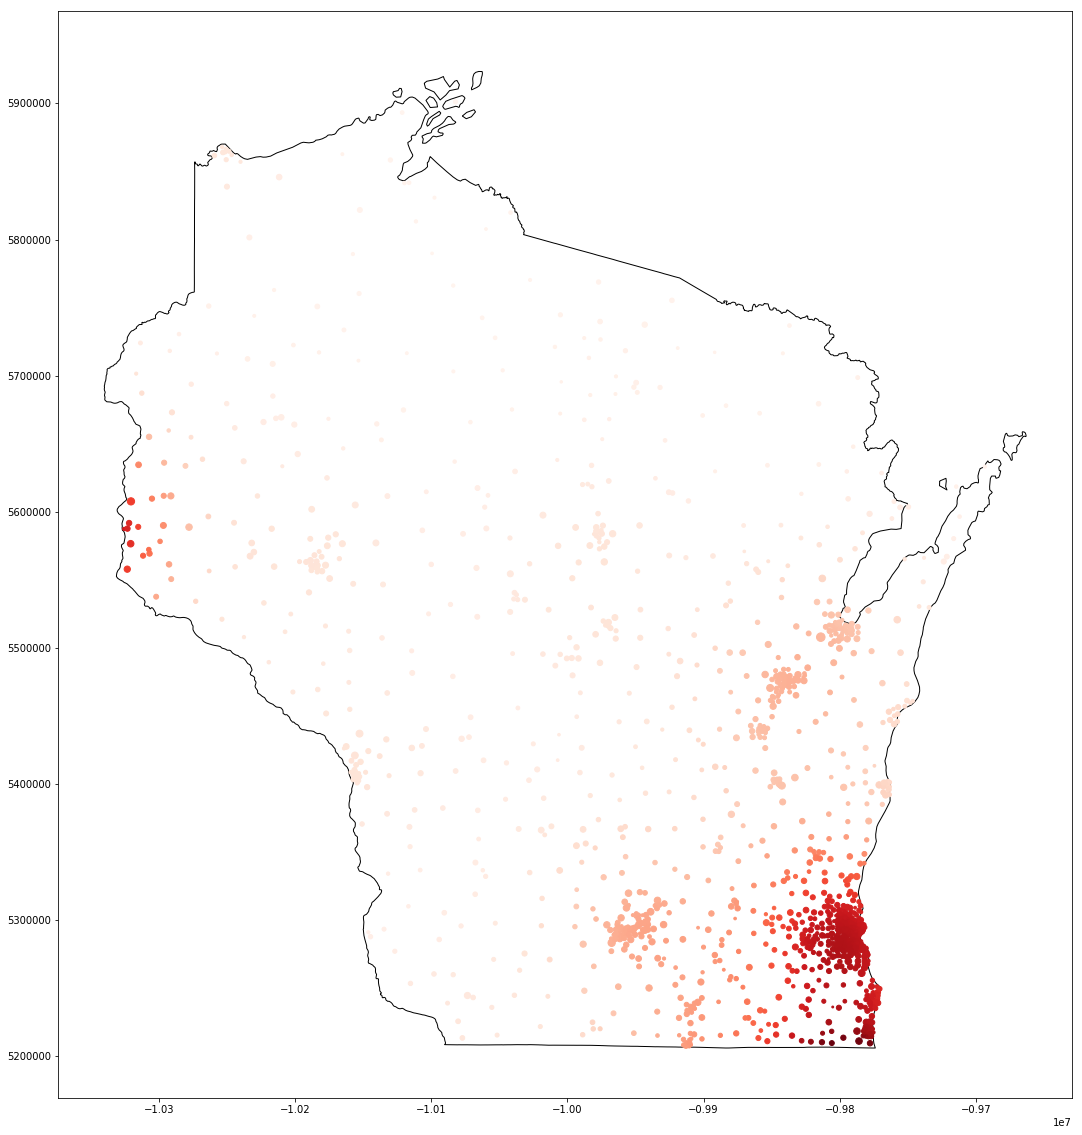

In [25]:
plot_state('WI')

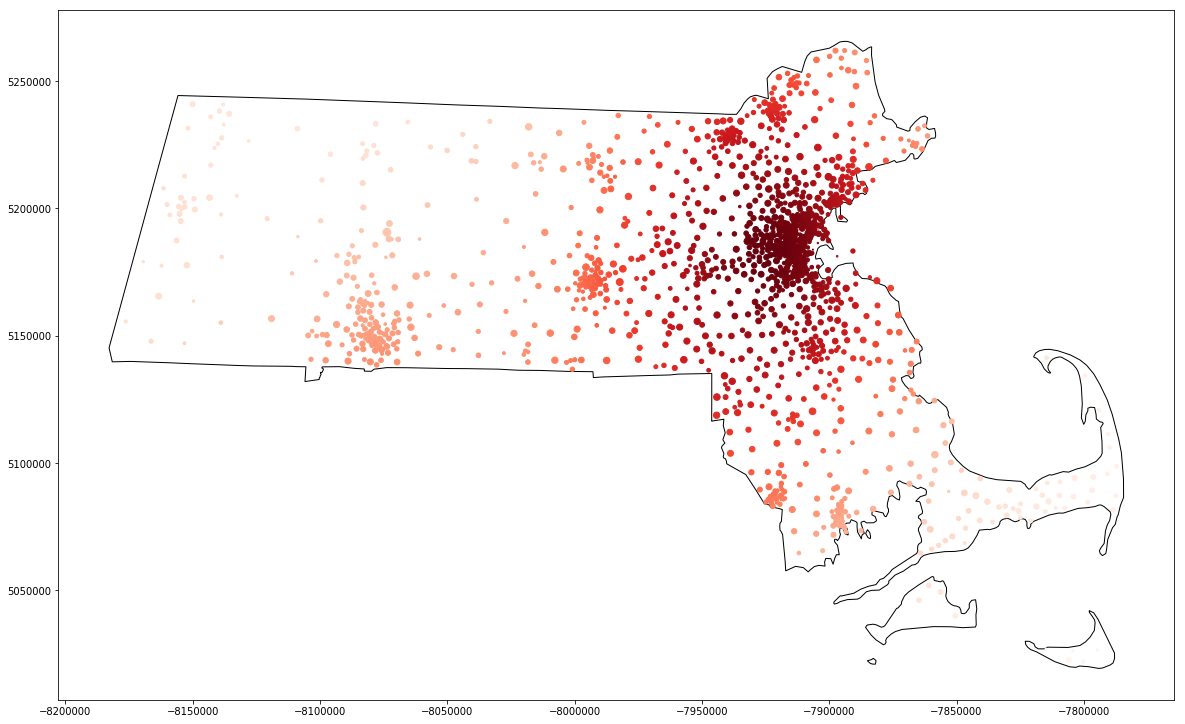

In [26]:
plot_state('MA')

In [27]:
states_cont = [s.abbr for s in us.states.STATES_CONTIGUOUS]

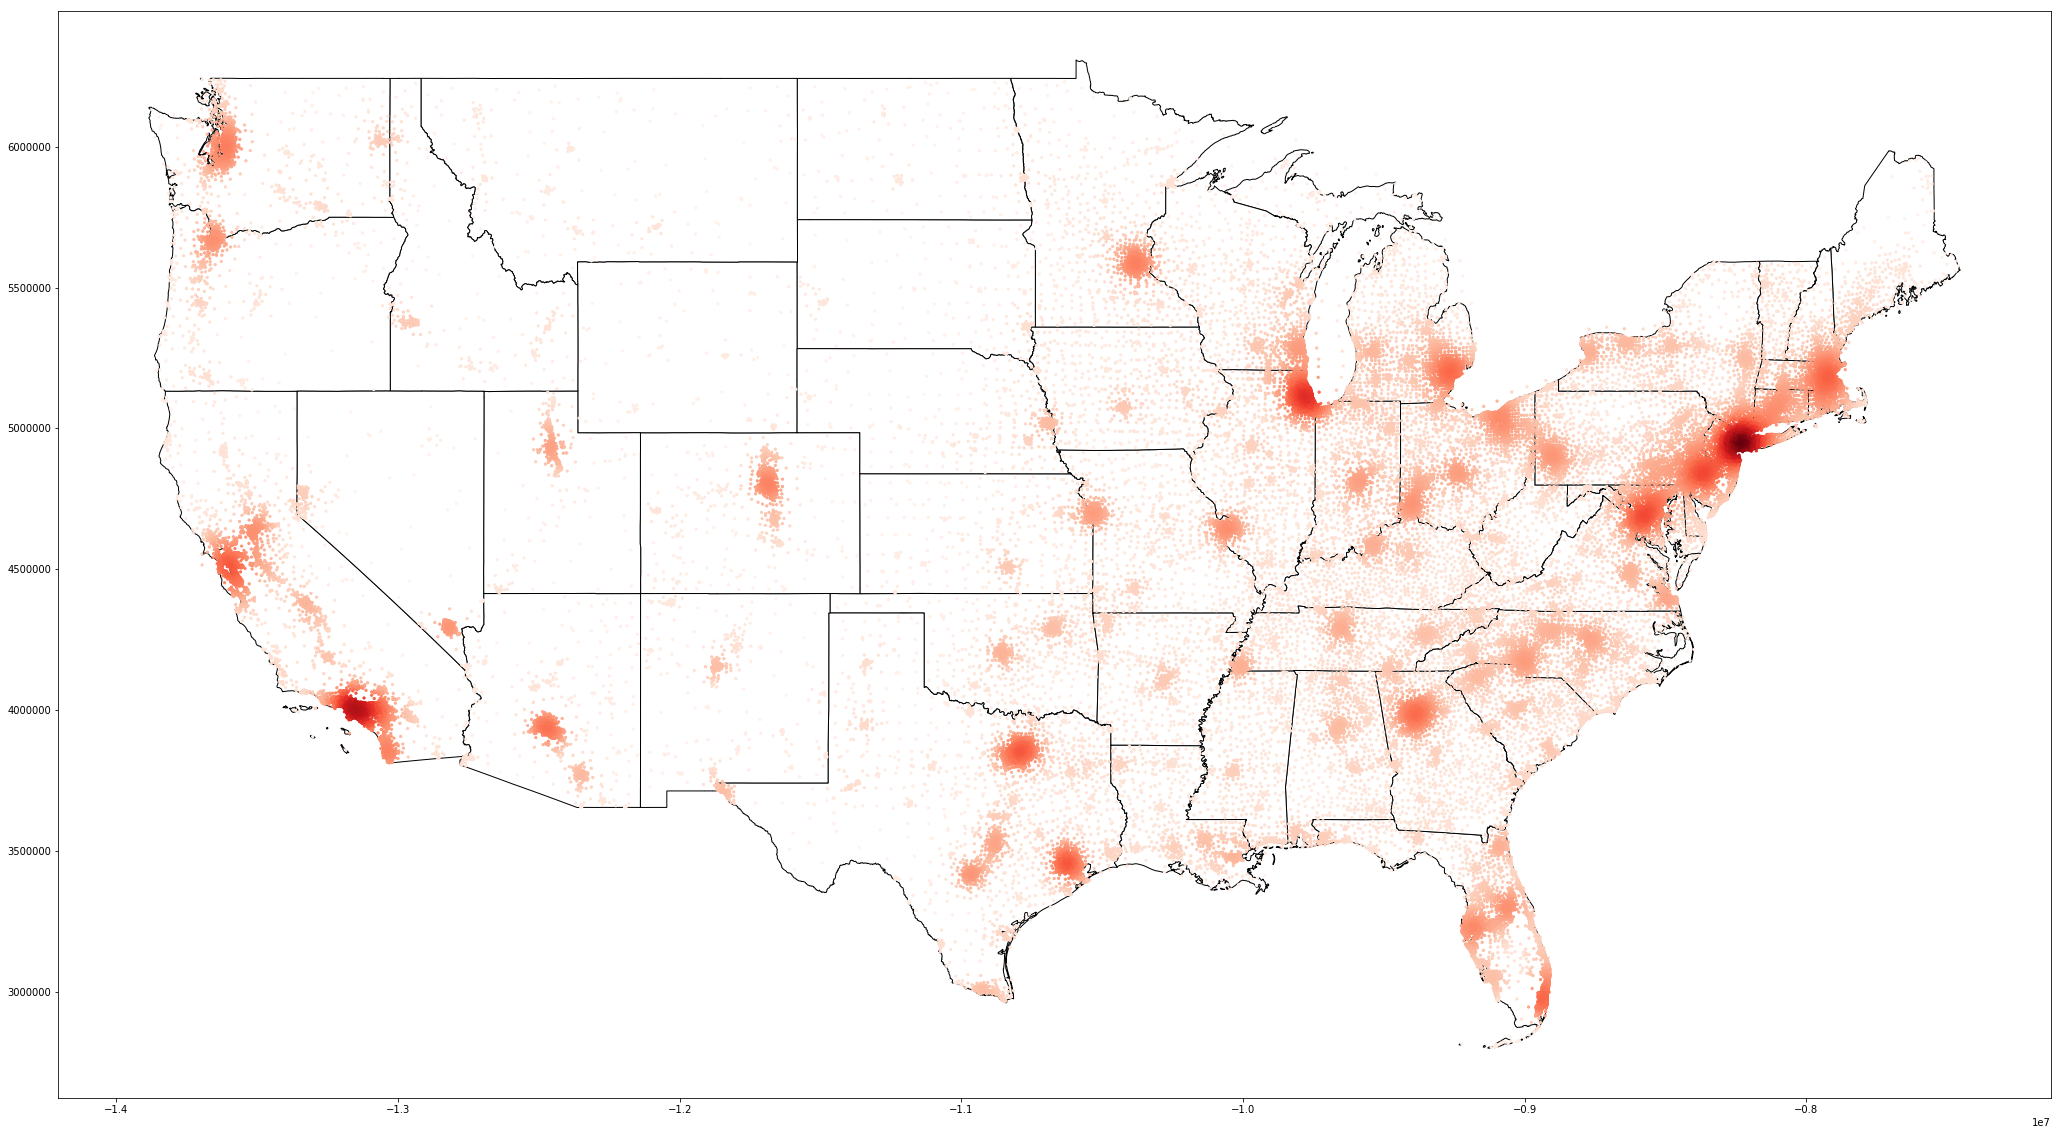

In [28]:
ax = states[states.STUSPS.isin(states_cont)].plot(color='white', edgecolor='black', figsize=(50,20))
sdf = gdf[gdf.USPS.isin(states_cont)]
plot_point_collection(ax, sdf.point, np.sqrt(sdf.DENSITY), markersize=5, cmap='Reds')

In [106]:
def plot_city(query):
    
    ua_match = uas[uas.NAME10.str.contains(query)].head(1)
    ax = ua_match.plot(color='white', edgecolor='black', figsize=(10,10))
    
    uadf = gdf[gdf.point.within(ua_match.iloc[0].geometry.boundary.convex_hull)]
    plot_point_collection(ax, uadf.point, np.sqrt(uadf.DENSITY), markersize=20, cmap='Reds')

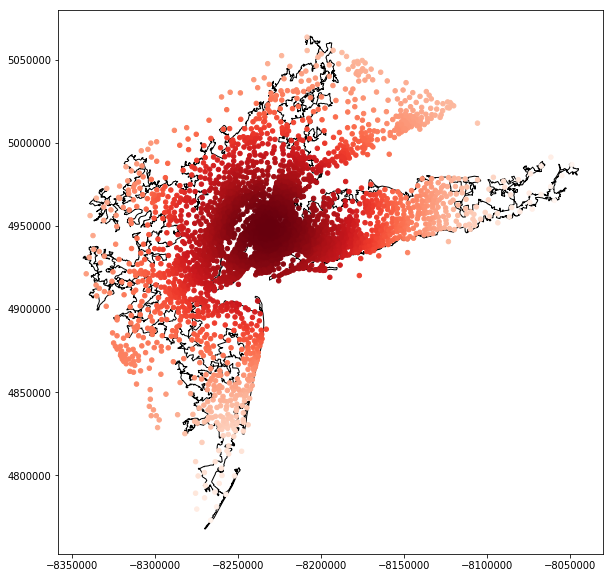

In [107]:
plot_city('New York')

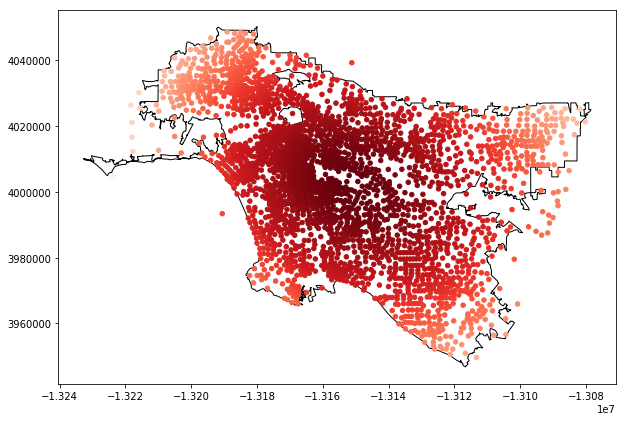

In [109]:
plot_city('Los Angeles')

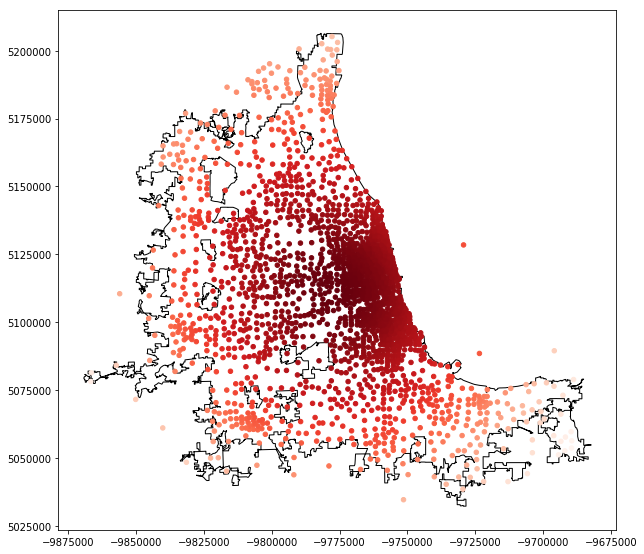

In [110]:
plot_city('Chicago')

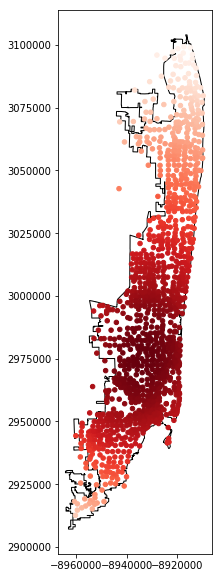

In [111]:
plot_city('Miami')

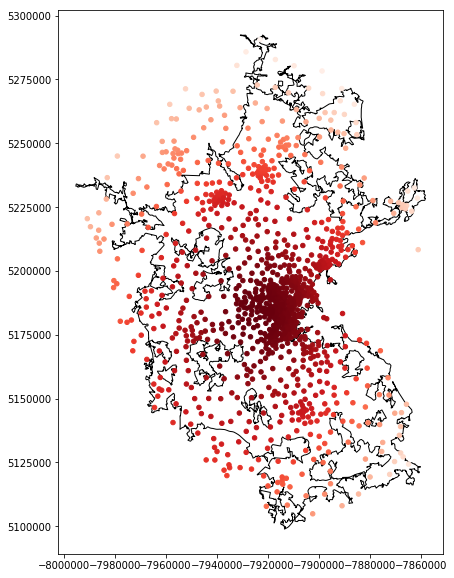

In [114]:
plot_city('Boston')

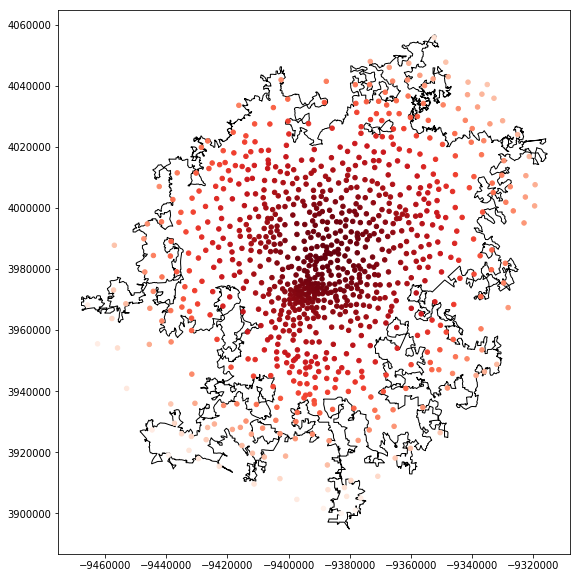

In [119]:
plot_city('Atlanta')